<h2>About this Exercise</h2>
<p>In this exercise, you will find the gradient of the logistic loss function and implement gradient descent.</p>

<h3>Evaluation</h3>

<p><strong>You must complete this exercise in order to unlock the final project in this module. Your score on this assignment will not be included in the final grade calculation.</strong><p>

<p>You are expected to write code where you see <em># YOUR CODE HERE</em> within the cells of this notebook. Not all cells will be graded; code input cells followed by cells marked with <em>#Autograder test cell</em> will be graded. Upon submitting your work, the code you write at these designated positions will be assessed using an "autograder" that will run all test cells to assess your code. You will receive feedback from the autograder that will identify any errors in your code. Use this feedback to improve your code if you need to resubmit. Be sure not to change the names of any provided functions, classes, or variables within the existing code cells, as this will interfere with the autograder. Also, remember to execute all code cells sequentially, not just those you’ve edited, to ensure your code runs properly.</p>
    
<p>You can resubmit your work as many times as necessary before the submission deadline. If you experience difficulty or have questions about this exercise, use the Q&A discussion board to engage with your peers or seek assistance from the instructor.<p>

<p>Before starting your work, please review <a href="https://s3.amazonaws.com/ecornell/global/eCornellPlagiarismPolicy.pdf">eCornell's policy regarding plagiarism</a> (the presentation of someone else's work as your own without source credit).</p>

<h3>Submit Code for Autograder Feedback</h3>

<p>Once you have completed your work on this notebook, you will submit your code for autograder review. Follow these steps:</p>

<ol>
  <li><strong>Save your notebook.</strong></li>
  <li><strong>Mark as Completed —</strong> In the blue menu bar along the top of this code exercise window, you’ll see a menu item called <strong>Education</strong>. In the <strong>Education</strong> menu, click <strong>Mark as Completed</strong> to submit your code for autograder/instructor review. This process will take a moment and a progress bar will show you the status of your submission.</li>
	<li><strong>Review your results —</strong> Once your work is marked as complete, the results of the autograder will automatically be presented in a new tab within the code exercise window. You can click on the assessment name in this feedback window to see more details regarding specific feedback/errors in your code submission.</li>
  <li><strong>Repeat, if necessary —</strong> The Jupyter notebook will always remain accessible in the first tabbed window of the exercise. To reattempt the work, you will first need to click <strong>Mark as Uncompleted</strong> in the <strong>Education</strong> menu and then proceed to make edits to the notebook. Once you are ready to resubmit, follow steps one through three. You can repeat this procedure as many times as necessary.</li>
</ol>

<h2>Getting Started</h2>
<h3>Python Initialization</h3> 

Please run the following code to initialize your Python kernel. You should be running a version of Python 3.x. </p>

In [1]:
import numpy as np
from pylab import *
import matplotlib.pyplot as plt
%matplotlib inline 

from helper import *

print('You\'re running python %s' % sys.version.split(' ')[0])

You're running python 3.6.5


Next, let's simulate some 2D data with binary (0/1) labels.  You'll be generating this data from non-overlapping multivariate normal distributions that should be very easily separable for logistic regression.

In [2]:
np.random.seed(12)
n_samples = 500

class_one = np.random.multivariate_normal([5, 10], [[1, .25],[.25, 1]], n_samples)
class_one_labels = np.zeros(n_samples)

class_two = np.random.multivariate_normal([0, 5], [[1, .25],[.25, 1]], n_samples)
class_two_labels = np.ones(n_samples)

features = np.vstack((class_one, class_two))
labels = np.hstack((class_one_labels, class_two_labels))

In [3]:
# Let's see what what our feature arrays look like. 
features

array([[ 5.04335829,  9.20878544],
       [ 5.84981837,  8.76685113],
       [ 5.34440936,  8.46476727],
       ...,
       [ 0.09521698,  3.98865267],
       [ 1.81113387,  3.70072773],
       [-0.09576516,  4.07467902]])

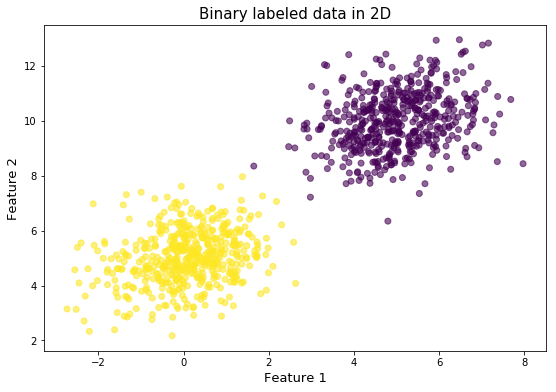

In [4]:
# We can visualize these data distributions
plt.figure(figsize=(9, 6))
plt.scatter(features[:, 0], features[:, 1],
            c = labels, alpha = .6);

plt.title("Binary labeled data in 2D", size=15);
plt.xlabel("Feature 1", size=13);
plt.ylabel("Feature 2", size=13);

In logistic regression, we use gradient ascent to solve for the weight vector that maximizes the (log) likelihood of observing the data.  (Equivalently, we can use gradient _descent_ to solve for the weight vector that _minimizes_ the _negative_ log likelihood - refer to Module 3 if you need a review of this derivation!)

<h2>Exercises</h2>

Code cells requiring your input will display # YOUR CODE HERE and graded portions will be adequately labeled.
<h3>Exercise 0: Sigmoid</h3>

<p>Implement the sigmoid function:    $\sigma(z)=\frac{1}{1+e^{-z}}$ </p>


In [11]:
def sigmoid(z):
    ### BEGIN SOLUTION
    sgmd = 1 / (1 + np.exp(-z))
    ### END SOLUTION
    return sgmd

In [12]:
def test_sigmoid1():
    n = 10
    h = np.random.rand(n)
    sgmd1 = sigmoid(h)
    sgmd2 = sigmoid_grader(h)
    return (np.linalg.norm(sgmd1 - sgmd2) < 1e-5)

def test_sigmoid2():
    x = np.random.rand(1)
    sgmd1 = sigmoid(x)
    sgmd2 = sigmoid_grader(x)
    return (np.linalg.norm(sgmd1 - sgmd2) < 1e-5)

runtest(test_sigmoid1, 'test_sigmoid1')
runtest(test_sigmoid2, 'test_sigmoid2')

Running Test: test_sigmoid1 ... ✔ Passed!
Running Test: test_sigmoid2 ... ✔ Passed!


In [13]:
# Autograder test cell - worth 1 point
# runs test_sigmoid1
### BEGIN HIDDEN TESTS

n = 10
h = np.random.rand(n)
sgmd1 = sigmoid(h)
sgmd2 = sigmoid_grader(h)
assert (np.linalg.norm(sgmd1 - sgmd2) < 1e-5)

### END HIDDEN TESTS

In [14]:
# Autograder test cell - worth 1 point
# runs test_sigmoid2
### BEGIN HIDDEN TESTS

x = np.random.rand(1)
sgmd1 = sigmoid(x)
sgmd2 = sigmoid_grader(x)
assert (np.linalg.norm(sgmd1 - sgmd2) < 1e-5)

### END HIDDEN TESTS

<h3>Exercise 1: Logistic Regression Using MLE</h3>

<p>Fill in the code below to finish implementing the MLE solution for logistic regression (if you need guidance, refer back to the Logistic Regression MLE read page in Module 3.<br></p>

<p>We consider binary logistic regression with classes +1 and -1. Implement a function <code>y_pred(X,w)</code> that computes the probability for each input row in <code>X</code> to have a positive label given the weight vector <code>w</code>. i.e. for each input row <code>x=X[i,:]</code> the corresponding i-th dimension of the output should be $P(y\;|\;\mathbf{x};\mathbf{w})$.</p>

In [58]:
def y_pred(X, w):
    # Input:
    # X: nxd matrix
    # w: d-dimensional vector
    # Output:
    # prob: n-dimensional vector 
    prob=sigmoid(X@w)
    return prob

In [64]:
def test_ypred1():
    n = 20
    d = 5
    X = np.random.rand(n,d) # generate n random vectors with d dimensions
    w = np.random.rand(5) # define a random weight vector
    probs=y_pred(X,w) # compute the probabilities of P(y=1|x;w) using your y_pred function
    return all(probs>=0) and all(probs<=1) # check if all outputs are >=0 and <=1

def test_ypred2():
    n = 20
    d = 5
    X = np.random.rand(n,d) # generate n random vectors with d dimensions
    w = np.random.rand(5) # define a random weight vector
    probs1=y_pred(X,w) # compute the probabilities of P(y=1|x;w) using your y_pred function
    probs2=y_pred(X,-w) # compute the probabilities of P(y=1|x;w) using your y_pred function
    return np.linalg.norm(probs1+probs2-1)<1e-08 # check if P(y|x;w)+P(y|x;-w)=1

def test_ypred3():
    X=np.array([[0.61793598, 0.09367891], # define 3 inputs (2D)
               [0.79447745, 0.98605996],
               [0.53679997, 0.4253885 ]])
    w=np.array([0.9822789 , 0.16017851]); # define weight vector
    prob=y_pred(X,w) # compute P(y|X;w)
    truth=np.array([0.65067119,0.71876504,0.64460901]) # this is the grount truth
    return np.linalg.norm(prob-truth)<1e-08 # see if they match

runtest(test_ypred1, 'test_ypred1')
runtest(test_ypred2, 'test_ypred2')
runtest(test_ypred3, 'test_ypred3')


Running Test: test_ypred1 ... ✔ Passed!
Running Test: test_ypred2 ... ✔ Passed!
Running Test: test_ypred3 ... ✔ Passed!


In [65]:
def log_likelihood(X, y, w):
    h_x = np.dot(X, w)
    ### BEGIN SOLUTION
    log_likelihood = np.sum(y*h_x - np.log(1 + np.exp(h_x)))
    ### END SOLUTION
    return log_likelihood

<h3>Exercise 2: Compute Gradient</h3>

Now, compute the gradient by taking the derivative of the log likelihood expression with respect to the weight vector.

Hint: you'll use the expressions `h_x` and `y_hat` that are already implemented.

In [66]:
def gradient(X, y, w):
    h_x = np.dot(X, w)
    y_hat = sigmoid(h_x)
    ### BEGIN SOLUTION
    grad = np.dot(X.T, (y - y_hat))
    ### END SOLUTION
    return grad

<h3>Exercise 3: Weight Update of Gradient Ascent</h3>
    
Write code below to implement the weight update of gradient ascent.  Hint: use the `y_pred` function above.

Recall that in gradient ascent, the weights are updated by the product of the learning rate alpha, and the gradient of the loss function with respect to the weight vector (which you implemented in the function above).  Pay close attention to the signs - are we adding or subtracting at each weight update step?  Why?

In [67]:
def logistic_regression(X, y, max_iter, alpha):
    _, d = X.shape
    weights = np.zeros(d)
    losses = np.zeros(max_iter)    
    
    for step in range(max_iter):
        ### BEGIN SOLUTION
        grad = gradient(X, y, weights)
        weights += alpha * grad
        losses[step] = log_likelihood(X, y, weights)
        ### END SOLUTION
    return weights, losses

In [68]:
def test_logistic_regression1 ():

    XUnit = np.array([[-1,1],[-1,0],[0,-1],[-1,2],[1,-2],[1,-1],[1,0],[0,1],[1,-2],[-1,2]])
    YUnit = np.hstack((np.ones(5), -np.ones(5)))

    [lss1,grd1] = logistic_regression(XUnit, YUnit, 30000, 5e-5)
    [lss2,grd2] = logistic_regression_grader(XUnit, YUnit, 30000, 5e-5)
    return(np.linalg.norm(lss1 - lss2) < 1e-5)

def test_logistic_regression2 ():

    X = np.vstack((np.random.randn(50, 5), np.random.randn(50, 5) + 2))
    Y = np.hstack((np.ones(50), -np.ones(50)))
    max_iter = 300
    alpha = 1e-5
    weights1, _ = logistic_regression(X, Y, max_iter, alpha)
    weights2, _ = logistic_regression_grader(X, Y, max_iter, alpha)
    return (np.linalg.norm(weights1 - weights2) < 1e-5)

runtest(test_logistic_regression1, 'test_logistic_regression1')
runtest(test_logistic_regression2, 'test_logistic_regression2')

Running Test: test_logistic_regression1 ... ✔ Passed!
Running Test: test_logistic_regression2 ... ✔ Passed!


In [69]:
# Autograder test cell - worth 1 point
# runs test_logistic_regression1
### BEGIN HIDDEN TESTS
XUnit = np.array([[-1,1],[-1,0],[0,-1],[-1,2],[1,-2],[1,-1],[1,0],[0,1],[1,-2],[-1,2]])
YUnit = np.hstack((np.ones(5), -np.ones(5)))

[lss1,grd1] = logistic_regression(XUnit, YUnit, 30000, 5e-5)
[lss2,grd2] = logistic_regression_grader(XUnit, YUnit, 30000, 5e-5)
assert(np.linalg.norm(lss1 - lss2) < 1e-5)


### END HIDDEN TESTS

In [70]:
# Autograder test cell - worth 1 point
# runs test_logistic_regression2
### BEGIN HIDDEN TESTS

X = np.vstack((np.random.randn(50, 5), np.random.randn(50, 5) + 2))
Y = np.hstack((np.ones(50), -np.ones(50)))
max_iter = 300
alpha = 1e-5
weights1, _ = logistic_regression(X, Y, max_iter, alpha)
weights2, _ = logistic_regression_grader(X, Y, max_iter, alpha)
assert (np.linalg.norm(weights1 - weights2) < 1e-5)

### END HIDDEN TESTS

### Now run your implementation on the binary classification data from the top of the notebook.  Check your code by plotting the values of the negative log likelihood - should these values increase or decrease as the number of iterations grows?  Do your values move in the right direction?

You can tune `max_iter` and `alpha` to see how they affect convergence!  

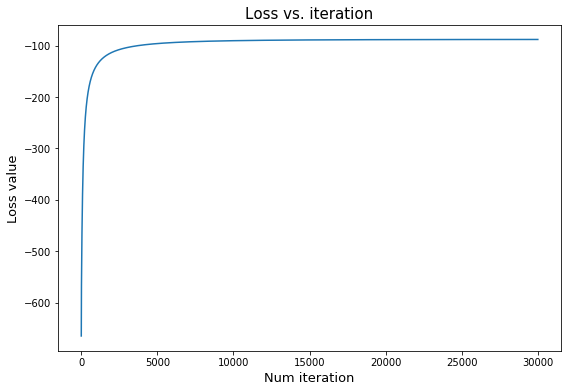

In [71]:
max_iter = 30000
alpha = 1e-5
final_weights, losses = logistic_regression(features, labels, max_iter, alpha)
plt.figure(figsize=(9, 6));
plt.plot(losses);
plt.title("Loss vs. iteration", size=15);
plt.xlabel("Num iteration", size=13);
plt.ylabel("Loss value", size=13);

Below, we'll take the final weights from the logistic solver and predict labels for the entire dataset.  By plotting the results, we can get a sense of where the linear decision boundary lies.  What do you notice?  What could be changed to further improve the accuracy of the classifier? (_Hint: take a look at the second video in Module 1._)

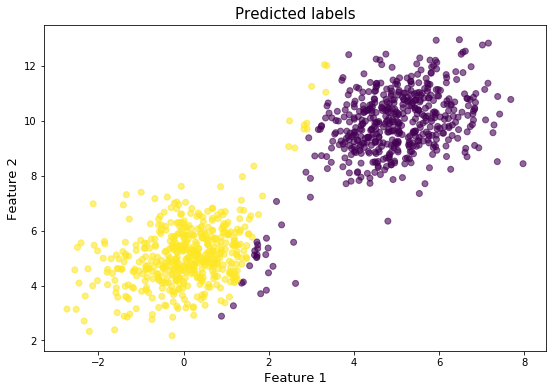

In [72]:
scores = y_pred(features, final_weights)
pred_labels = np.round(scores)
plt.figure(figsize=(9, 6))
plt.scatter(features[:, 0], features[:, 1],
            c = pred_labels, alpha = .6);
plt.title("Predicted labels", size=15);
plt.xlabel("Feature 1", size=13);
plt.ylabel("Feature 2", size=13);